# Statistical Machine Learning
                                                    Yiming Tan, yt2633

# Problem 1
## 1.

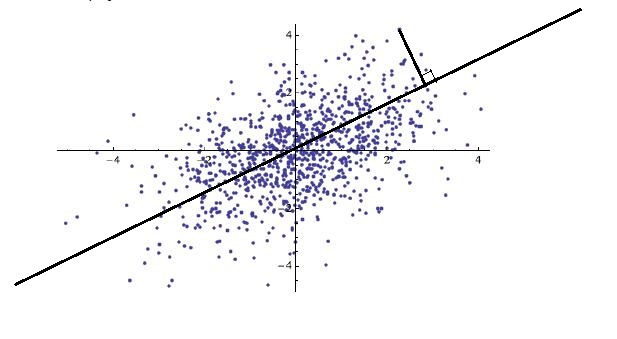

In [2]:
import os
os.chdir("E:/taniesta/Columbia University/Courses Files/Semester II/Statsitical Machine Learning/assignment/hw2")
from IPython.display import Image
Image(filename = "pca2.jpg", width = 400, height = 400)

## 2.
### (a). 
There are 10304 principle components in total.

### (b).
First we need to make eigenvalue decomposition on $X'X$:
$$X'X = V \Sigma V',$$
where V is the eigenvators matrix of $X'X$ and is orthogonal.
Let $V_L$ be a matrix consisting of L columns in V that have the largest corresponding eigen values. Then $\hat{x} = xV_L$

# Problem 2

## 1.

**This notebook is mainly using python, but the data have to be first download using the following codes in R. If you want to run the codes in this notebook, please first run these codes in R and go back to this ipynb file.

In [18]:
### These are R codes!!!
#library(quantmod)
#symbol.list <- c("AAPL","AXP","BA","CAT","CSCO",
#                 "CVX","DIS","DWDP","GS","HD",
#                 "IBM","INTC","JNJ","JPM","KO",
#                 "MCD","MMM","MRK","MSFT","NKE",                 
#                 "PFE","PG","TRV","UNH","UTX",
#                 "VZ","V","WMT","WBA","XOM")

#data <- data.frame()

#for (sym in symbol.list){
#  dt <- getSymbols(sym, auto.assign = F, src = "yahoo",
#                 from = "2018-01-01", to = "2019-01-01")
#  data <- cbind(data,dt[,4])
#}
#print(colnames(data))
#write.csv(data,file = "ClosingPrices.csv")

## 2.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv("ClosingPrices.csv",
                   index_col=False)
data = data.iloc[:,1:]

In [4]:
scaler = StandardScaler(with_std=False)
data_c = pd.DataFrame(scaler.fit_transform(data))
pca = PCA()
pca.fit(data_c)
data_new1 = pca.fit_transform(data_c)

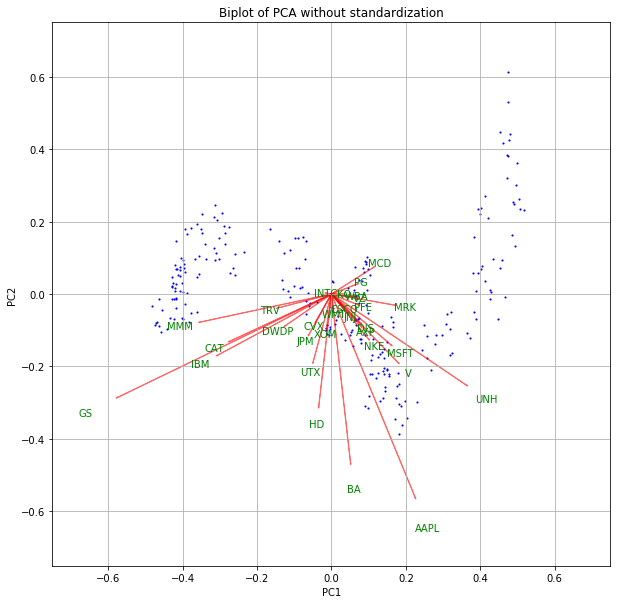

In [5]:
#function for biplot
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s = 1.2, c = "b")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,
                     data.columns[i][:-6] , color = 'g',
                     ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,
                     labels[i], color = 'g', ha = 'center', va = 'center')
plt.figure(figsize=(10,10))
plt.xlim(-.75,.75)
plt.ylim(-.75,.75)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Biplot of PCA without standardization")
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_new1[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

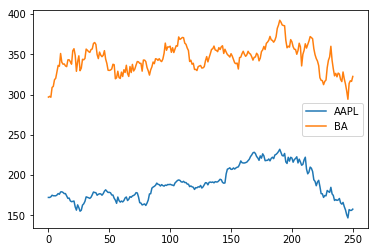

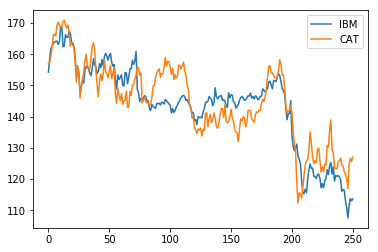

In [36]:
aaplplt, = plt.plot(data['AAPL.Close'])
baplt, = plt.plot(data['BA.Close'])
plt.legend((aaplplt,baplt),["AAPL","BA"])
plt.show()
ibmplt, = plt.plot(data['IBM.Close'])
catplt, = plt.plot(data['CAT.Close'])
plt.legend((ibmplt,catplt),["IBM","CAT"])
plt.show()

The biplot can really demonstrate some stuctures. Stocks that are closed to each other in the biplot have similar pattern. Check the time series plots above, it is easy to notice that AAPL and BA are highly correlated, thus being closing to each other in the biplot. So are IBM and CAT.

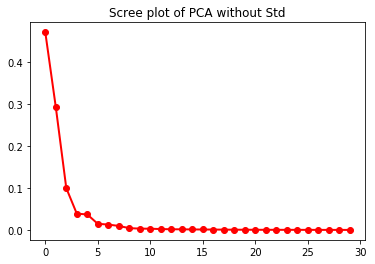

In [22]:
plt.plot(range(30),pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Scree plot of PCA without Std")
plt.show()

From the Scree plot above we can see that there are only 2-3 important components. The first two components can explain nearly 80% percent of the variance.

## 3.

In this part, we repeat section 2, except here we make standardization first.

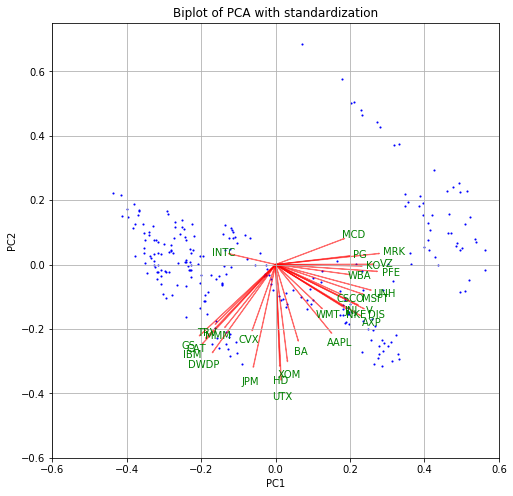

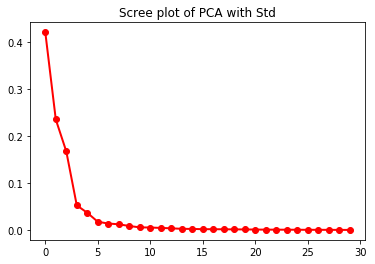

In [7]:
def pca_ana(data):
    scaler = StandardScaler()
    data_s = pd.DataFrame(scaler.fit_transform(data))
    pca = PCA()
    pca.fit(data_s)
    data_new2 = pca.fit_transform(data_s)
    #Biplot. Use only the 2 PCs.
    plt.figure(figsize=(8,8))
    plt.xlim(-.6,.6)
    plt.ylim(-.6,.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title("Biplot of PCA with standardization")
    plt.grid()
    myplot(data_new2[:,0:2],
           np.transpose(pca.components_[0:2, :]))
    plt.show()
    #Scree plot
    plt.plot(range(30),
             pca.explained_variance_ratio_,
             'ro-', linewidth=2)
    plt.title("Scree plot of PCA with Std")
    plt.show()
pca_ana(data)

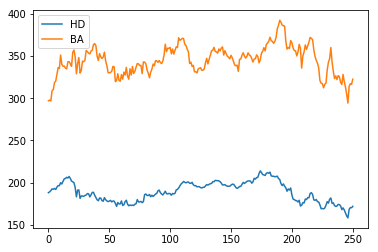

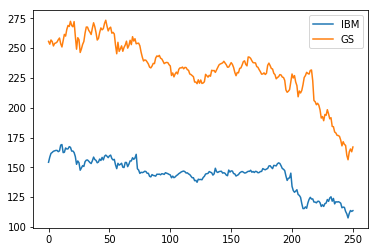

In [37]:
hdplt, = plt.plot(data['HD.Close'])
baplt, = plt.plot(data['BA.Close'])
plt.legend((hdplt,baplt),["HD","BA"])
plt.show()
ibmplt, = plt.plot(data['IBM.Close'])
gsplt, = plt.plot(data['GS.Close'])
plt.legend((ibmplt,catplt),["IBM","GS"])
plt.show()

Similarly, stocks that are closed to each other in the biplot have similar patterns, which can be demonstrated by plotting the time series There are 3 important components after standardization.

## 4.
We then do the same thing to the return calculated based on the closing prices.

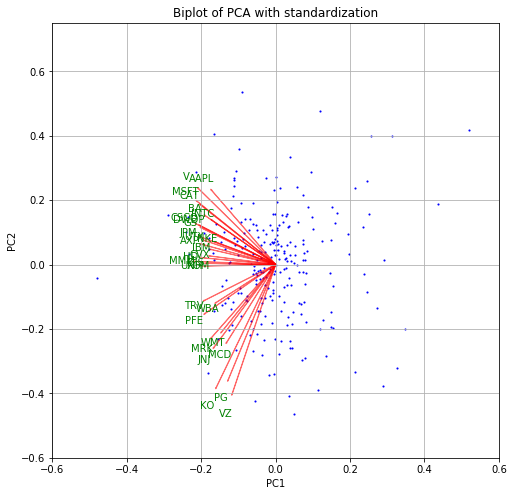

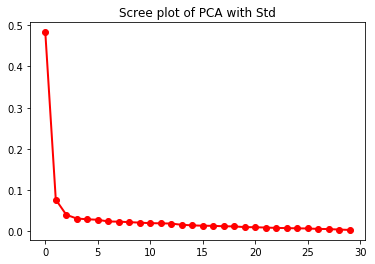

In [8]:
dt_return = (data.shift(-1)-data).iloc[:-1,:]
pca_ana(dt_return)

In the screeplot, the importance of the first component is extremmely high, which implies that the some stock prices are correlated and may have a similar pattern. From the biplot, it is very likely that there are two types of general patterns. If each stock fluctuates randomly and independently, the screeplot would be quite flat since it is hard to extract a component to represent the data. 